In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [52]:

data = pd.read_csv('Cancer_Data.csv')

# Visualizar as primeiras linhas do dataset
print(data.dtypes)


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
# Remover a coluna ID
data = data.drop(columns=['id'])
data = data.drop(columns=['Unnamed: 32'])


data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


X = data.drop(columns=['diagnosis'])
y = data['diagnosis']


In [53]:
# Contar valores NaN em cada coluna usando isnull()
nan_count = data.isnull().sum()
print(nan_count)


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:

model = SVC(kernel='linear')  # Você pode experimentar outros kernels como 'rbf' ou 'poly'


model.fit(X_train, y_train)


SVC(kernel='linear')

In [15]:

y_pred = model.predict(X_test)


In [16]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



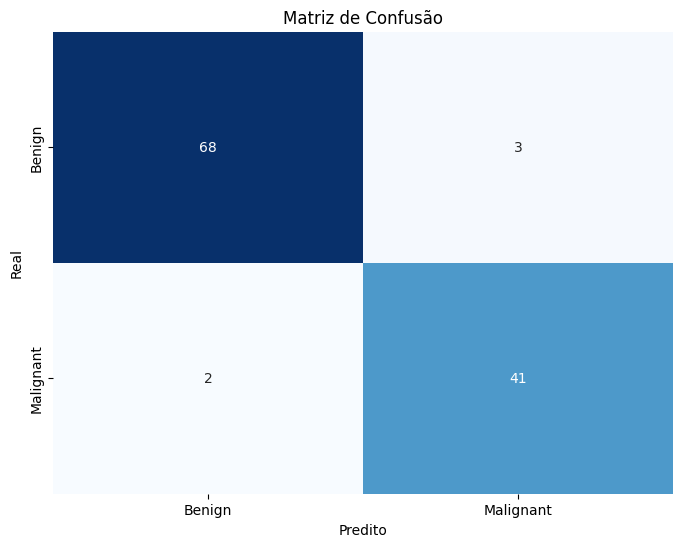

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar o gráfico da matriz de confusão sem a colorbar
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], cbar=False)
plt.ylabel('Real')
plt.xlabel('Predito')
plt.title('Matriz de Confusão')
plt.show()



In [44]:
y_scores = model.decision_function(X_test)


new_threshold = 0.1


y_pred_adjusted = np.where(y_scores > new_threshold, 1, 0)  # 1 para maligno, 0 para benigno

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



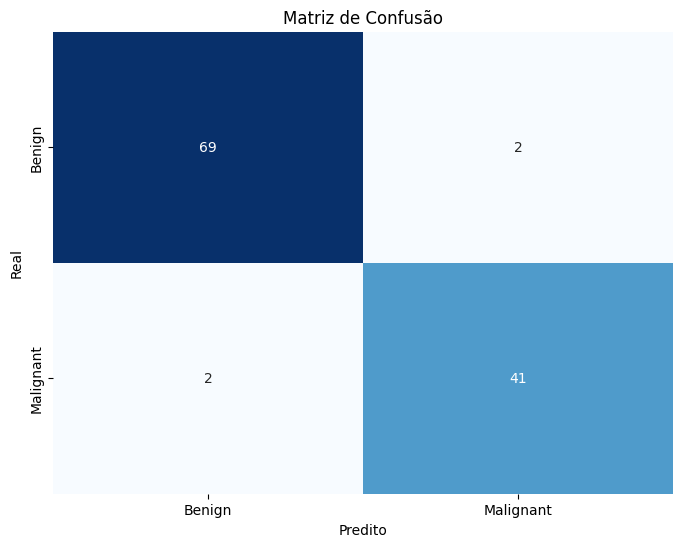

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred_adjusted)

# Criar o gráfico da matriz de confusão sem a colorbar
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], cbar=False)
plt.ylabel('Real')
plt.xlabel('Predito')
plt.title('Matriz de Confusão')
plt.show()